# Method comparison
Assume for a specific type of measurement, there are two methods for performing it. A common question in this context is if both methods could replace each other. Therefore, similarity of measurements is investigated. One method for this is Bland-Altman analysis called after Martin Bland and Douglas Altman. 

See also
[Measurement in Medicine: the Analysis of Method Comparison Studies](https://www-users.york.ac.uk/~mb55/meas/ab83.pdf)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Before we dive into Bland-Altman analysis, we have a look at straight-forward methods for comparing methods. An important assumption is that we worked with paired data. That means we can apply the two measurement methods to the same sample without destroying it and without the two methods harming each other.

In [2]:
# make up some data
measurement_A = [1, 9, 7, 1, 2, 8, 9, 2, 1, 7, 8]
measurement_B = [4, 5, 5, 7, 4, 5, 4, 6, 6, 5, 4]

# show measurements as table
pd.DataFrame([measurement_A, measurement_B], ["A", "B"]).transpose()

,A,B
0,1,4
1,9,5
2,7,5
3,1,7
4,2,4
5,8,5
6,9,4
7,2,6
8,1,6
9,7,5


## Comparison of means
A very simple method for comparing arrays of measurements is comparing their means.

In [2]:
print("Mean(A) = " + str(np.mean(measurement_A)))
print("Mean(B) = " + str(np.mean(measurement_B)))

Mean(A) = 5.0
Mean(B) = 5.0


Using this method one could conclude that both methods deliver similar measurements because their mean is equal. However, this might be misleading.

## Scatter plots
A more visual method for method comparison is drawing scatter plots. In these plots measurements of the one method are plotted against the other method.

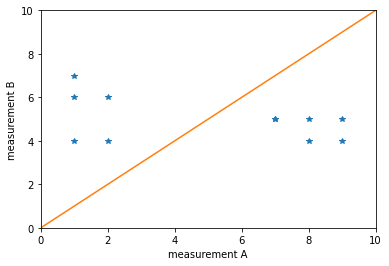

In [4]:
plt.plot(measurement_A, measurement_B, "*")
plt.plot([0, 10], [0, 10])
plt.axis([0, 10, 0, 10])
plt.xlabel('measurement A')
plt.ylabel('measurement B')
plt.show()

Obviously A and B lead to quite different results. If the blue points would lie on the orange line, we would conclude that the measurements are related.

## Histograms
As we concluded already that both measurements lie in different ranges, we should take a look at the distribution. Histograms are a good plot of choice. To make sure histograms for both measurements are visualized the same, e.g. with the same range on the x-axis, we can write our own little `draw_histogram` function:

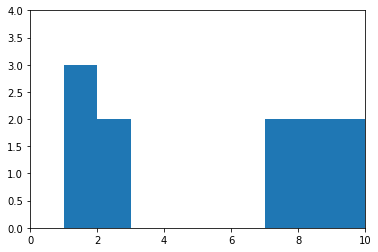

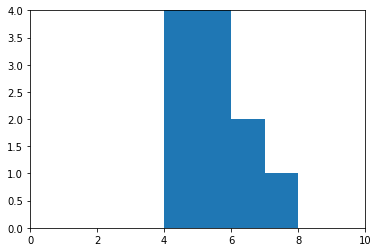

In [5]:
def draw_histogram(data):
    counts, bins = np.histogram(data, bins=10, range=(0,10))
    plt.hist(bins[:-1], bins, weights=counts)
    plt.axis([0, 10, 0, 4])
    plt.show()
    
draw_histogram(measurement_A)
draw_histogram(measurement_B)

# Correlation
For measuring the relationship between two measurements, we can take [Pearson's definition of a correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

The data for the following expriment is taken from [Altman & Bland, The Statistician 32, 1983](https://www-users.york.ac.uk/~mb55/meas/ab83.pdf), Fig. 1.

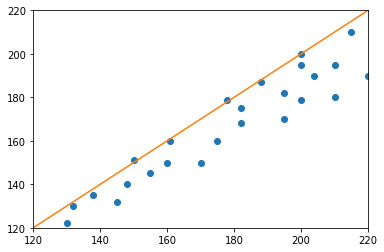

In [6]:
# new measurements
measurement_1 = [130, 132, 138, 145, 148, 150, 155, 160, 161, 170, 175, 178, 182, 182, 188, 195, 195, 200, 200, 204, 210, 210, 215, 220, 200]
measurement_2 = [122, 130, 135, 132, 140, 151, 145, 150, 160, 150, 160, 179, 168, 175, 187, 170, 182, 179, 195, 190, 180, 195, 210, 190, 200]

# scatter plot
plt.plot(measurement_1, measurement_2, "o")
plt.plot([120, 220], [120, 220])
plt.axis([120, 220, 120, 220])
plt.show()

In [7]:
# Determining Pearson's correlation coefficient r with a for-loop
import numpy as np

# get the mean of the measurements
mean_1 = np.mean(measurement_1)
mean_2 = np.mean(measurement_2)

# get the number of measurements
n = len(measurement_1)

# get the standard deviation of the measurements
std_dev_1 = np.std(measurement_1)
std_dev_2 = np.std(measurement_2)

# sum the expectation of 
sum = 0
for m_1, m_2 in zip(measurement_1, measurement_2):
    sum = sum + (m_1 - mean_1) * (m_2 - mean_2) / n

r = sum / (std_dev_1 * std_dev_2)

print ("r = " + str(r))

r = 0.9435300113035253


In [8]:
# Determine Pearson's r using scipy
from scipy import stats

stats.pearsonr(measurement_1, measurement_2)[0]

0.9435300113035255

# Bland-Altman plots
Bland-Altman plots are a way to visualize differences between paired measurements specifically. When googling for python code that draws such plots, one can end up with this solution:

In [29]:
# A function for drawing Bland-Altman plots
# source https://stackoverflow.com/questions/16399279/bland-altman-plot-in-python
import matplotlib.pyplot as plt
import numpy as np

def bland_altman_plot(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference

    plt.scatter(mean, diff, *args, **kwargs)
    plt.axhline(md,           color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')
    plt.xlabel("Average")
    plt.ylabel("Difference")

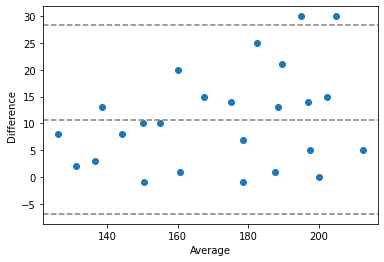

In [30]:
# draw a Bland-Altman plot
bland_altman_plot(measurement_1, measurement_2)
plt.show()

Alternatively, one can use more advanced visualizations using statsmodels (`pip install statsmodels`). It needs numpy-arrays to work with and doesn't work with lists.

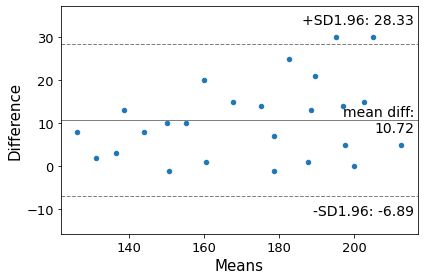

In [31]:
from statsmodels.graphics.agreement import mean_diff_plot

m1 = np.asarray(measurement_1)
m2 = np.asarray(measurement_2)

plot = mean_diff_plot(m1, m2)

... or [pyCompare](https://github.com/jaketmp/pyCompare) (`pip install pycompare`)

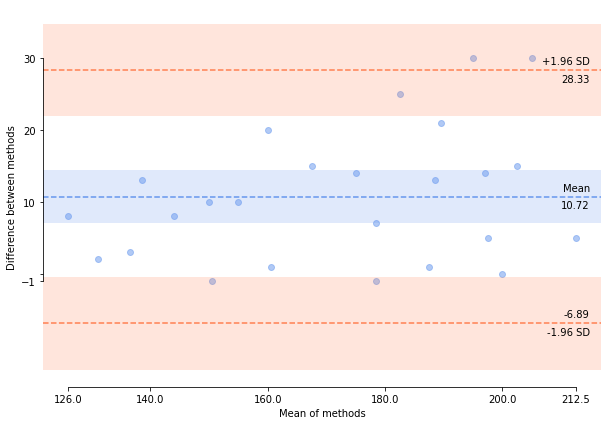

In [38]:
from pyCompare import blandAltman

blandAltman(measurement_1, measurement_2)

## Some simulated situations
For simulating some characteristic bland altman plots, we start by setting a ground truth set of numbers, e.g. radii in mm of 100 cherries.

In [34]:
radii = np.random.normal(15, scale=1, size=(100))

# for demo purposes: print the first 5
print(radii[:5])

[15.4577106  15.11508802 16.86934982 15.29076651 14.42486062]


We assume these radii are the perfect ground truth. We will now measure the size of these cherries twice. Our measurement device is not perfect and thus, has a little error.

In [35]:
measurement_r1 = radii +  np.random.normal(0, scale=0.5, size=(100))
measurement_r2 = radii +  np.random.normal(0, scale=0.5, size=(100))

print(measurement_r1[:5])
print(measurement_r2[:5])

[15.14551881 14.92249568 16.85061067 14.78898959 13.64443509]
[15.47718509 15.24270528 15.68261195 14.88722018 15.49833482]


Plotting these two measurements against each other in a Bland-Altman plot visualizes the agreement between the methods. Note the symmetry of the plot and that the data points are arranged around difference = 0. 

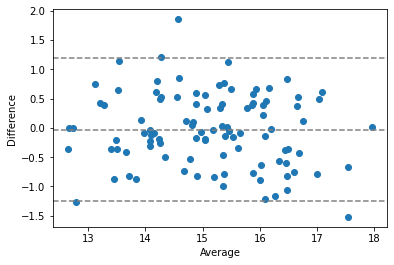

In [36]:
bland_altman_plot(measurement_r1, measurement_r2)
plt.show()

### Additive bias
If one method tends to measure more than the other method by a fixed offset, we call that an additive bias:

In [37]:
offset = 1

measurement_r1 = radii +  np.random.normal(0, scale=0.5, size=(100))
measurement_r2 = radii +  np.random.normal(0, scale=0.5, size=(100)) + offset

print(measurement_r1[:5])
print(measurement_r2[:5])

[15.66385846 15.53260706 17.0155594  14.73923702 13.15358991]
[16.86127472 16.63235425 17.48110119 17.09151812 15.48288134]


You can observe the offset in the Bland-Altman plot because the measurements are arranged around difference = offset:

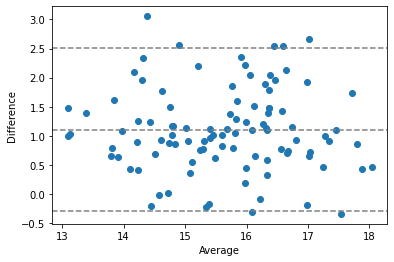

In [38]:
bland_altman_plot(measurement_r1, measurement_r2)
plt.show()

### Multiplicative bias
If one method always measures more than the other linearily depending on the measurement itself, we call that a multiplicative bias.

In [40]:
factor = 1.1

measurement_r1 = radii +  np.random.normal(0, scale=0.5, size=(100))
measurement_r2 = radii +  np.random.normal(0, scale=0.5, size=(100)) * factor

print(measurement_r1[:5])
print(measurement_r2[:5])

[16.02431173 14.70093759 17.47105221 15.14800279 14.48853967]
[15.41278801 15.31892595 17.70144083 15.30149295 14.42794309]


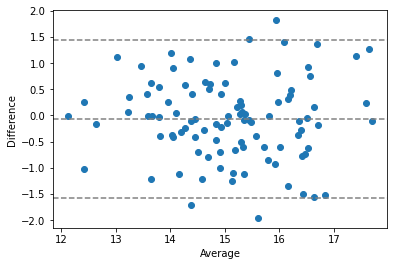

In [41]:
bland_altman_plot(measurement_r1, measurement_r2)
plt.show()

As the effect is harder to see, we use a higher factor.

[15.78233005 15.27400261 17.27362997 14.83804946 14.66469   ]
[14.36098097 14.41459593 17.28367556 14.08009311 14.07240613]


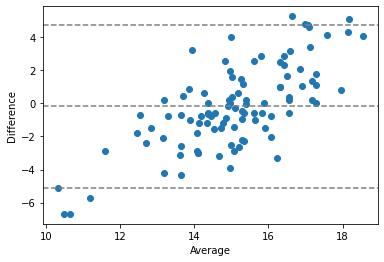

In [43]:
factor = 5

measurement_r1 = radii +  np.random.normal(0, scale=0.5, size=(100))
measurement_r2 = radii +  np.random.normal(0, scale=0.5, size=(100)) * factor

print(measurement_r1[:5])
print(measurement_r2[:5])

bland_altman_plot(measurement_r1, measurement_r2)
plt.show()

## Exercise
Process the banana dataset again, e.g. using a for-loop that goes through the folder `../data/banana/` and processes all the images. Measure the size of the banana slices using the [scikit-image thresholding methods](https://scikit-image.org/docs/dev/search.html?q=threshold_&check_keywords=yes&area=default#) `threshold_otsu` and `threshold_yen`. Compare both methods using the techniques you learned above.